In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [20]:
df = pd.read_csv(r"C:\Users\harid\OneDrive\Desktop\data sets\Yerevan-Hotels.csv")

In [21]:
df.head()

,Hotel Names,Star Rating,Rating,Free Parking,Fitness Centre,Spa and Wellness Centre,Airport Shuttle,Staff,Facilities,Location,Comfort,Cleanliness,Price Per Day($)
0,Kenut Hostel,NaN,9.7,Yes,No,No,No,9.9,9.8,8.8,9.7,9.8,30.0
1,Kantar Hostel,NaN,9.3,Yes,No,No,Yes,9.7,9.4,9.7,9.2,9.2,15.0
2,Sweet Sleep hostel,NaN,9.5,Yes,No,No,No,9.8,9.5,8.9,9.4,9.5,20.0
3,Royal Boutique Hotel on Kievyan,NaN,7.4,Yes,No,No,Yes,8.1,7.3,8.3,7.5,7.8,26.0
4,Areg Hotel,3.0,8.2,No,No,No,No,9.1,8.0,8.3,8.1,8.2,29.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hotel Names              120 non-null    object 
 1   Star Rating              79 non-null     float64
 2   Rating                   115 non-null    float64
 3   Free Parking             120 non-null    object 
 4   Fitness Centre           120 non-null    object 
 5   Spa and Wellness Centre  120 non-null    object 
 6   Airport Shuttle          120 non-null    object 
 7   Staff                    115 non-null    float64
 8   Facilities               115 non-null    float64
 9   Location                 115 non-null    float64
 10  Comfort                  115 non-null    float64
 11  Cleanliness              115 non-null    float64
 12  Price Per Day($)         120 non-null    float64
dtypes: float64(8), object(5)
memory usage: 12.3+ KB


In [23]:
df["Star Rating"].dtype

dtype('float64')

In [24]:
df.describe()

,Star Rating,Rating,Staff,Facilities,Location,Comfort,Cleanliness,Price Per Day($)
count,79.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,120.000000
mean,3.772152,8.794783,9.261739,8.761739,8.913043,8.936522,8.936522,77.200000
std,0.678410,0.774692,0.534032,0.906757,0.794998,0.744492,0.773161,61.391203
min,2.000000,5.000000,7.500000,2.500000,7.000000,5.000000,5.000000,6.000000
25%,3.000000,8.450000,9.100000,8.400000,8.400000,8.700000,8.700000,40.000000
50%,4.000000,8.900000,9.400000,8.900000,8.900000,9.100000,9.100000,62.500000
75%,4.000000,9.300000,9.650000,9.300000,9.650000,9.400000,9.400000,110.000000
max,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,525.000000


In [25]:
df.isnull().sum()

Hotel Names                 0
Star Rating                41
Rating                      5
Free Parking                0
Fitness Centre              0
Spa and Wellness Centre     0
Airport Shuttle             0
Staff                       5
Facilities                  5
Location                    5
Comfort                     5
Cleanliness                 5
Price Per Day($)            0
dtype: int64

In [26]:
num_col = df.columns[df.dtypes!='object']
cat_col = df.columns[df.dtypes =='object']


In [27]:
print(f'num_col:{num_col}')
print(f'cat_col:{cat_col}')

num_col:Index(['Star Rating', 'Rating', 'Staff', 'Facilities', 'Location', 'Comfort',
       'Cleanliness', 'Price Per Day($)'],
      dtype='object')
cat_col:Index(['Hotel Names', 'Free Parking', 'Fitness Centre',
       'Spa and Wellness Centre', 'Airport Shuttle'],
      dtype='object')


In [28]:
#Fill missing values for num columns with the mean
df[num_col] = df[num_col].apply(lambda col : col.fillna(col.median()))

#Fill missing values for cat columns with the mode
df[cat_col] = df[cat_col].apply(lambda col: col.fillna(col.mode))


In [29]:
df[num_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Star Rating       120 non-null    float64
 1   Rating            120 non-null    float64
 2   Staff             120 non-null    float64
 3   Facilities        120 non-null    float64
 4   Location          120 non-null    float64
 5   Comfort           120 non-null    float64
 6   Cleanliness       120 non-null    float64
 7   Price Per Day($)  120 non-null    float64
dtypes: float64(8)
memory usage: 7.6 KB


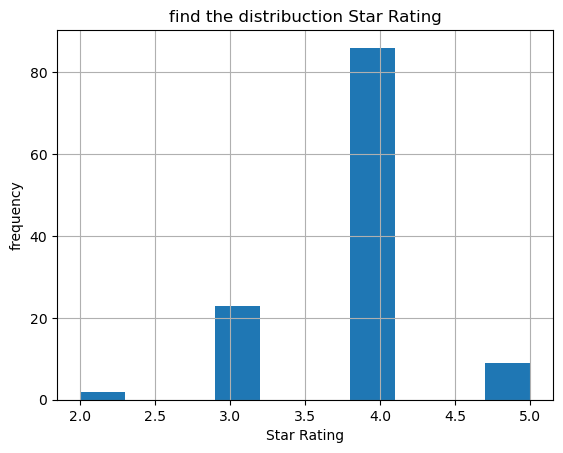

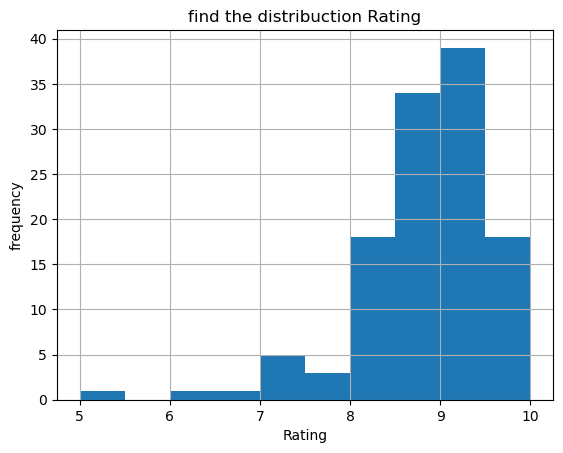

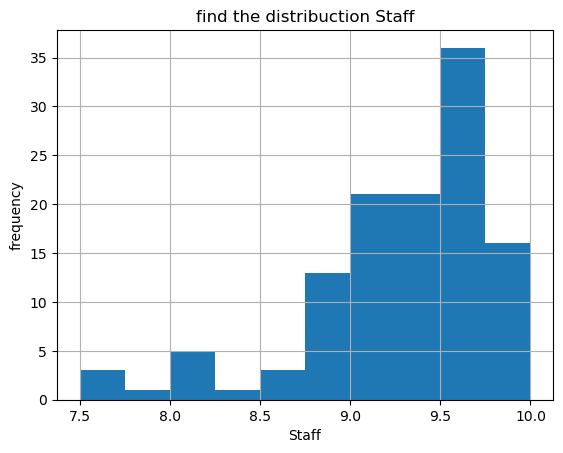

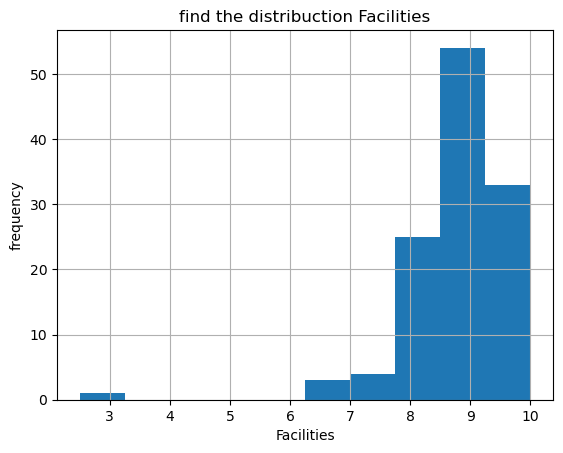

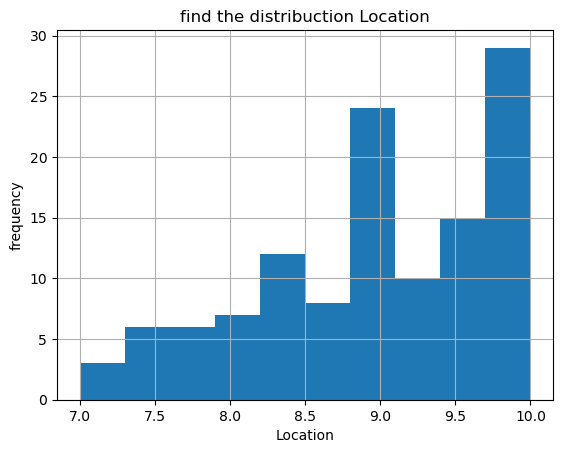

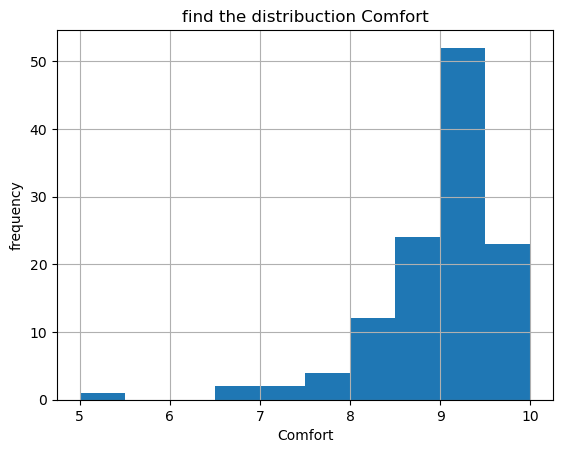

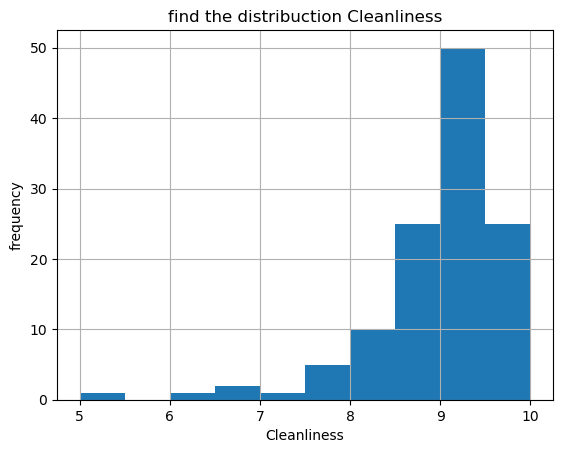

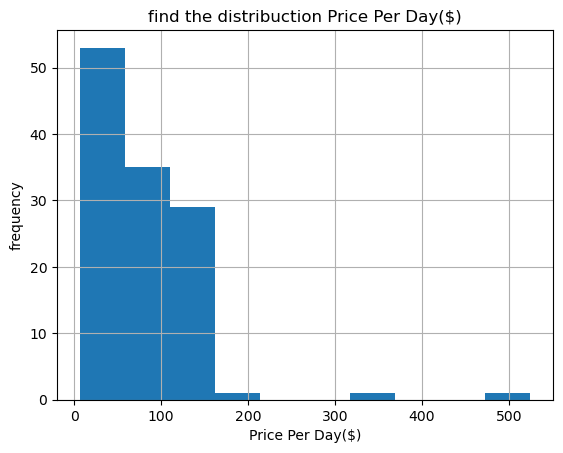

In [30]:
# #histogram  in num columns
for x in num_col:
    df[x].hist()
    plt.title(f"find the distribuction {x}")
    plt.xlabel(x)
    plt.ylabel('frequency')
    plt.show()
    

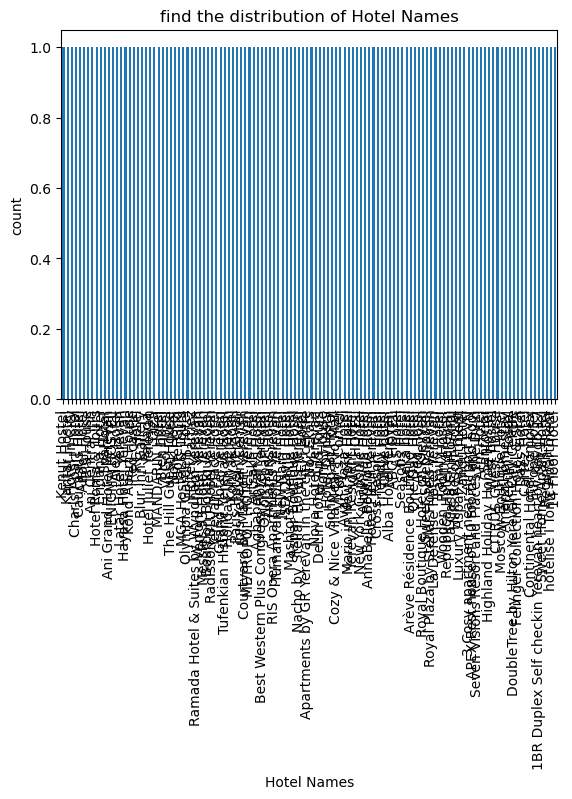

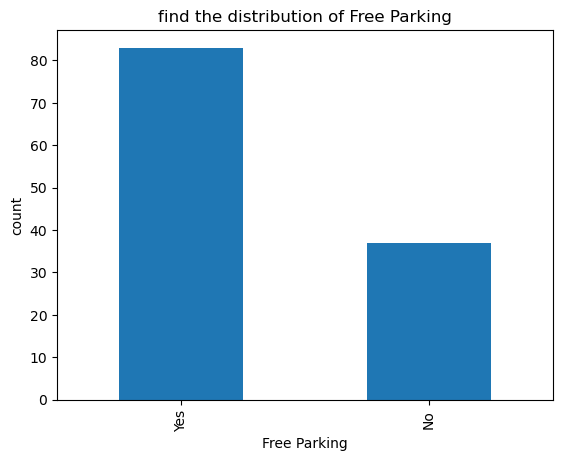

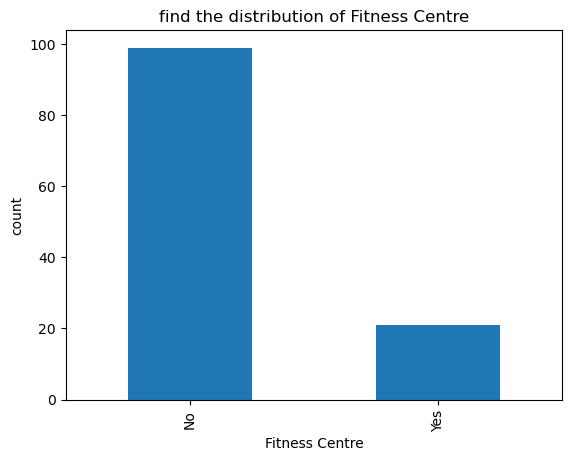

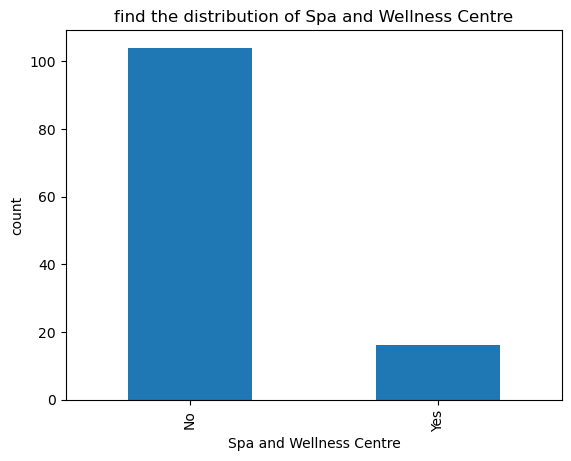

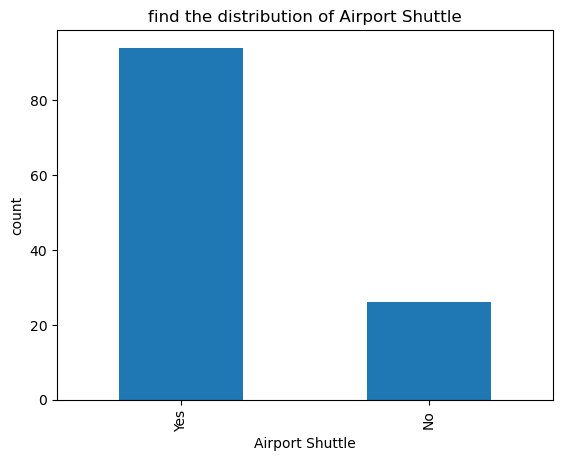

In [31]:
#bar plots for cat columns 
for x in cat_col:
    plt.figure()
    df[x].value_counts().plot(kind ='bar')
    plt.title(f'find the distribution of {x}')
    plt.xlabel(x)
    plt.ylabel('count')
    plt.show()
    

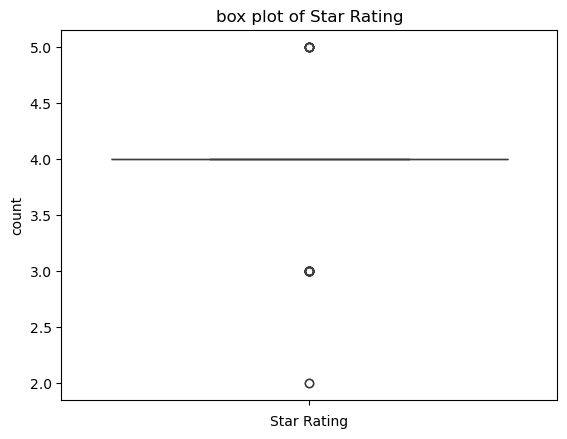

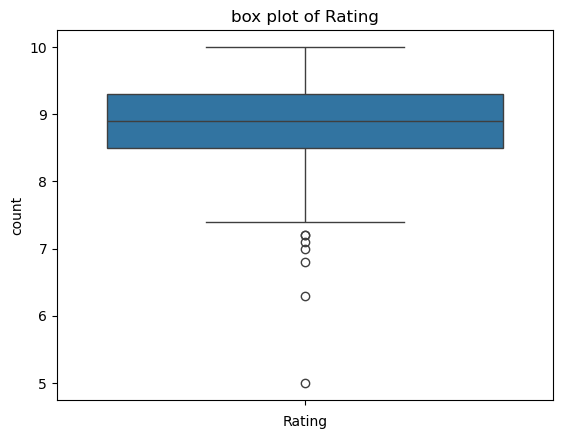

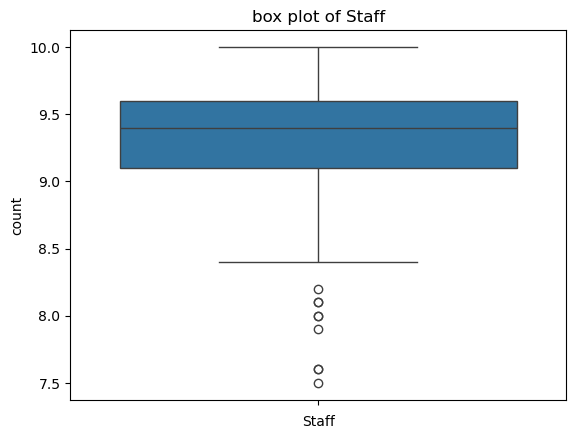

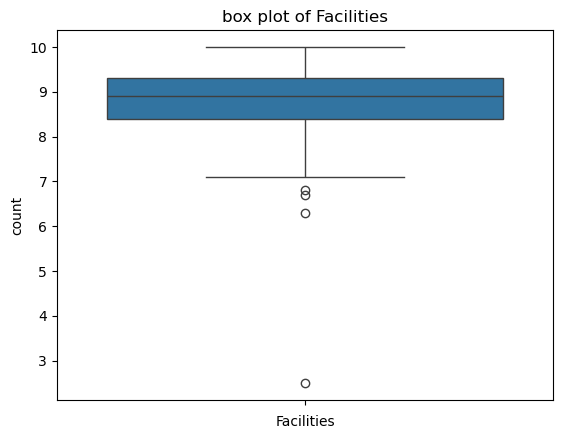

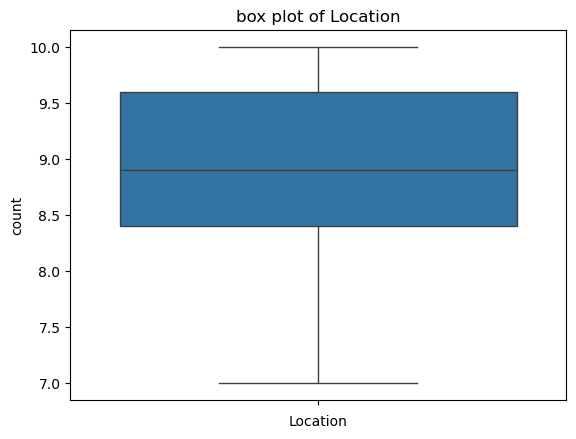

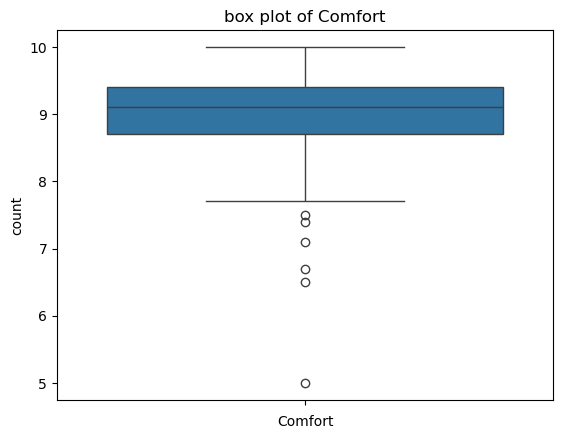

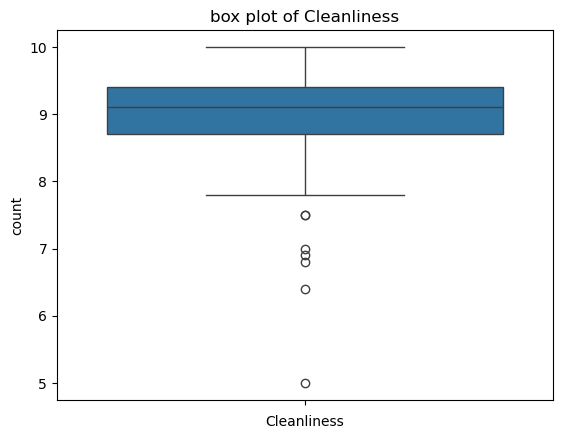

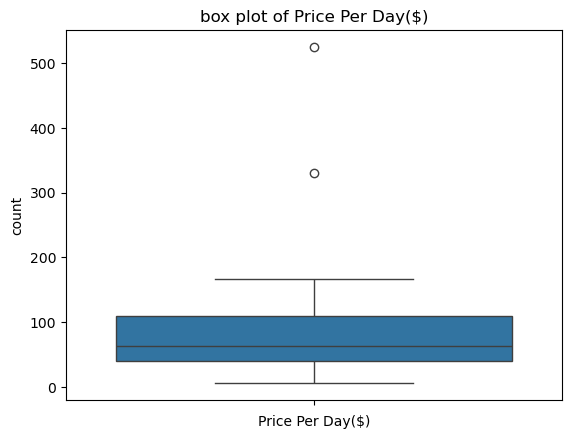

In [32]:
# #box plots to identify outlayer in num col
for x in num_col:
     plt.figure()
     sns.boxplot(data=df[x])
     plt.title(f'box plot of {x}')
     plt.xlabel(x)
     plt.ylabel('count')
     plt.show()

In [33]:
#remove outlayer using  IQR method
q1 = df[num_col].quantile(0.10)
q2 = df[num_col].quantile(0.80)
q3 = q2 - q1

df = df [~((df[num_col] < (q1 -1.5 * q3)) | (df[num_col] > (q2 +1.5 * q3))).any(axis=1)]
q3

Star Rating          1.00
Rating               1.40
Staff                1.00
Facilities           1.32
Location             2.01
Comfort              1.30
Cleanliness          1.31
Price Per Day($)    87.10
dtype: float64

In [34]:
#calculate correlation matrix
correlation_matrix =df[num_col].corr()


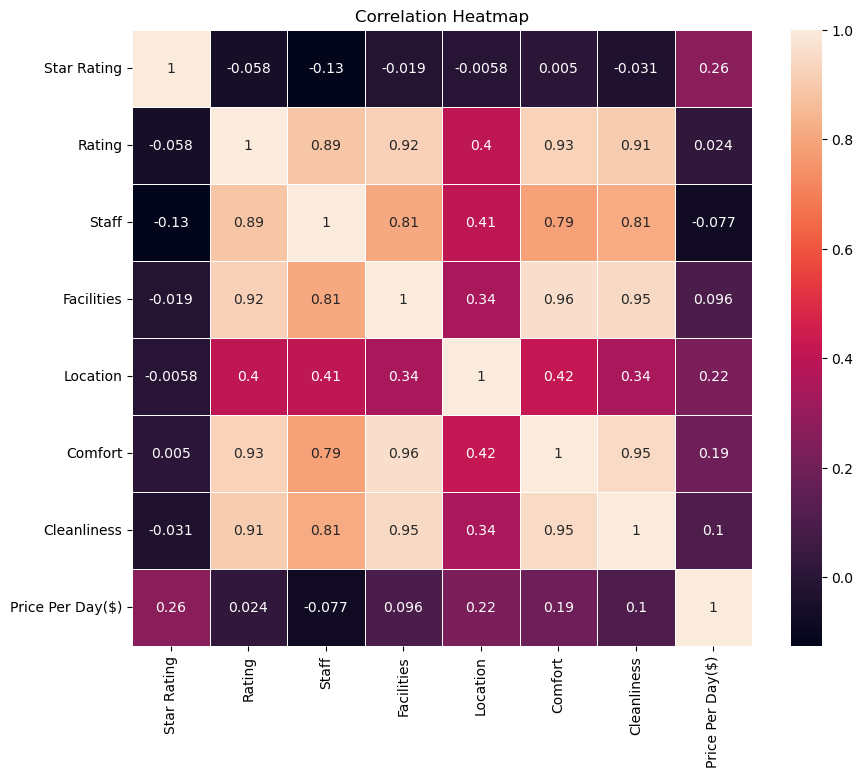

In [35]:

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot = True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [36]:
#standarize or feature scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler = LabelEncoder()
scaler

LabelEncoder()

In [37]:
df[num_col]= scaler.fit_transform(num_col)

print(df[num_col])

     Star Rating  Rating  Staff  Facilities  Location  Comfort  Cleanliness  \
0              7       5      6           2         3        1            0   
1              7       5      6           2         3        1            0   
2              7       5      6           2         3        1            0   
3              7       5      6           2         3        1            0   
4              7       5      6           2         3        1            0   
..           ...     ...    ...         ...       ...      ...          ...   
115            7       5      6           2         3        1            0   
116            7       5      6           2         3        1            0   
117            7       5      6           2         3        1            0   
118            7       5      6           2         3        1            0   
119            7       5      6           2         3        1            0   

     Price Per Day($)  
0                   4  
1  

In [38]:
df[cat_col]= scaler.fit_transform(cat_col)
print(df[cat_col])

     Hotel Names  Free Parking  Fitness Centre  Spa and Wellness Centre  \
0              3             2               1                        4   
1              3             2               1                        4   
2              3             2               1                        4   
3              3             2               1                        4   
4              3             2               1                        4   
..           ...           ...             ...                      ...   
115            3             2               1                        4   
116            3             2               1                        4   
117            3             2               1                        4   
118            3             2               1                        4   
119            3             2               1                        4   

     Airport Shuttle  
0                  0  
1                  0  
2                  0  
3      

In [39]:
df[num_col]

,Star Rating,Rating,Staff,Facilities,Location,Comfort,Cleanliness,Price Per Day($)
0,7,5,6,2,3,1,0,4
1,7,5,6,2,3,1,0,4
2,7,5,6,2,3,1,0,4
3,7,5,6,2,3,1,0,4
4,7,5,6,2,3,1,0,4
...,...,...,...,...,...,...,...,...
115,7,5,6,2,3,1,0,4
116,7,5,6,2,3,1,0,4
117,7,5,6,2,3,1,0,4
118,7,5,6,2,3,1,0,4


In [40]:
df[cat_col]

,Hotel Names,Free Parking,Fitness Centre,Spa and Wellness Centre,Airport Shuttle
0,3,2,1,4,0
1,3,2,1,4,0
2,3,2,1,4,0
3,3,2,1,4,0
4,3,2,1,4,0
...,...,...,...,...,...
115,3,2,1,4,0
116,3,2,1,4,0
117,3,2,1,4,0
118,3,2,1,4,0


In [41]:
result = pd.concat([df[num_col], df[cat_col]], axis=1, join='outer')
print(result)
result.info()

     Star Rating  Rating  Staff  Facilities  Location  Comfort  Cleanliness  \
0              7       5      6           2         3        1            0   
1              7       5      6           2         3        1            0   
2              7       5      6           2         3        1            0   
3              7       5      6           2         3        1            0   
4              7       5      6           2         3        1            0   
..           ...     ...    ...         ...       ...      ...          ...   
115            7       5      6           2         3        1            0   
116            7       5      6           2         3        1            0   
117            7       5      6           2         3        1            0   
118            7       5      6           2         3        1            0   
119            7       5      6           2         3        1            0   

     Price Per Day($)  Hotel Names  Free Parking  F

In [42]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 0 to 119
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Star Rating              117 non-null    int32
 1   Rating                   117 non-null    int32
 2   Staff                    117 non-null    int32
 3   Facilities               117 non-null    int32
 4   Location                 117 non-null    int32
 5   Comfort                  117 non-null    int32
 6   Cleanliness              117 non-null    int32
 7   Price Per Day($)         117 non-null    int32
 8   Hotel Names              117 non-null    int32
 9   Free Parking             117 non-null    int32
 10  Fitness Centre           117 non-null    int32
 11  Spa and Wellness Centre  117 non-null    int32
 12  Airport Shuttle          117 non-null    int32
dtypes: int32(13)
memory usage: 6.9 KB


In [60]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
from sklearn.preprocessing import LabelEncoder
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [44]:
#independent and dependent features
x = result.drop(columns=['Price Per Day($)'])
y = result["Price Per Day($)"]
x.columns

Index(['Star Rating', 'Rating', 'Staff', 'Facilities', 'Location', 'Comfort',
       'Cleanliness', 'Hotel Names', 'Free Parking', 'Fitness Centre',
       'Spa and Wellness Centre', 'Airport Shuttle'],
      dtype='object')

In [45]:
y

0      4
1      4
2      4
3      4
4      4
      ..
115    4
116    4
117    4
118    4
119    4
Name: Price Per Day($), Length: 117, dtype: int32

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state= 40)

In [47]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(93, 12)
(24, 12)
(93,)
(24, 12)


In [48]:
#standardize or feature scaling the datasets
scaler = StandardScaler()
scaler

StandardScaler()

In [49]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [50]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
x_test

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.,

In [52]:
#MODEL TRAINING
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [53]:
regression = LinearRegression()
regression

LinearRegression()

In [54]:
regression.fit(x_train,y_train)


LinearRegression()

In [55]:
print(regression.coef_)
print(regression.intercept_)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4.0


In [56]:
reg_pred = regression.predict(x_test)
reg_pred

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4.])

In [57]:
#make predictions
y_pred_train = regression.predict(x_train)
y_pred_test = regression.predict(x_test)

In [58]:
#Evaluate the model
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred_test)
train_r2 = r2_score(y_train,y_pred_train)
test_r2 = r2_score(y_test,y_pred_test)

In [59]:
print(f'TRAIN_MSE:{train_mse},Train R2:{train_r2}')
print(f'TEST_mse:{test_mse},Test R2:{test_r2}')

TRAIN_MSE:0.0,Train R2:1.0
TEST_mse:0.0,Test R2:1.0
